1️⃣ Compute Mean & Variance over the mini-batch:

2️⃣ Normalize:

3️⃣ Scale & Shift (to allow the network to learn optimal distributions):

In [250]:
import torch

import torch.nn as nn 

import torch.optim as optim

import matplotlib.pyplot as plt

✅ Without Batch Normalization

train a simple neural network without BN and check its training behavior.

In [251]:
# Generate toy dataset

X = torch.randn(1000,2)

y = (X[:,0] * X[:,1] > 0).float().unsqueeze(1) # XOR-like dataset

In [252]:
# Define Neural Network without BatchNorm

class SimpleNN(nn.Module):

    def __init__(self):
        super(SimpleNN, self).__init__()

        self.fc1 = nn.Linear(2,4)

        self.fc2 = nn.Linear(4,1)

        self.activation = nn.ReLU()

    def forward(self, x):

        x = self.activation(self.fc1(x))

        x = self.fc2(x)

        return x

In [253]:
# Model, loss, optimizer

model = SimpleNN()

loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [254]:
# Training loop

losses = []

for epoch in range(500):

    optimizer.zero_grad()

    predictions = model(X)

    loss = loss_fn(predictions, y)

    loss.backward()
 
    optimizer.step()


    losses.append(loss.item())

    if epoch % 50 == 0:  
        print(f"Epoch {epoch}, Loss: {loss.item()}")


Epoch 0, Loss: 0.6810892820358276
Epoch 50, Loss: 0.5084081888198853
Epoch 100, Loss: 0.3854886293411255
Epoch 150, Loss: 0.3138124346733093
Epoch 200, Loss: 0.26569610834121704
Epoch 250, Loss: 0.23140519857406616
Epoch 300, Loss: 0.20534874498844147
Epoch 350, Loss: 0.18535250425338745
Epoch 400, Loss: 0.169235497713089
Epoch 450, Loss: 0.1557258516550064


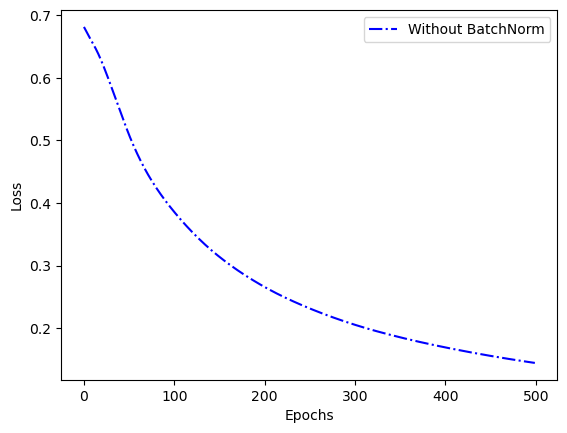

In [255]:

plt.plot(losses, label='Without BatchNorm', color='blue', linestyle='dashdot')  # Add markers to check points

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

✅ With Batch Normalization

In [256]:
class SimpleNN_BN(nn.Module):

    def __init__(self):
        super(SimpleNN_BN, self).__init__()

        self.fc1 = nn.Linear(2,4)

        self.bn1 = nn.BatchNorm1d(4) # Batch Normalization Layer

        self.fc2 = nn.Linear(4,1)

        self.activation = nn.ReLU()

    def forward(self, x):

        x = self.activation(self.bn1(self.fc1(x))) # Apply BatchNorm after Linear 

        x = self.fc2(x)

        return x

In [257]:
# Train the model with BatchNorm

model_BN = SimpleNN_BN()

optimizer_BN = optim.Adam(model_BN.parameters(), lr=0.01)

In [258]:
losses_BN = []

for epoch in range(500):

    optimizer_BN.zero_grad()

    predictions  = model_BN(X)

    loss = loss_fn(predictions,y)

    loss.backward()

    optimizer_BN.step()

    losses_BN.append(loss.item())

    if epoch % 50 == 0:  
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 0.7188059091567993
Epoch 50, Loss: 0.5749606490135193
Epoch 100, Loss: 0.5135354995727539
Epoch 150, Loss: 0.484733909368515
Epoch 200, Loss: 0.4683380126953125
Epoch 250, Loss: 0.4566561281681061
Epoch 300, Loss: 0.4478367269039154
Epoch 350, Loss: 0.44086703658103943
Epoch 400, Loss: 0.4354263246059418
Epoch 450, Loss: 0.43081867694854736


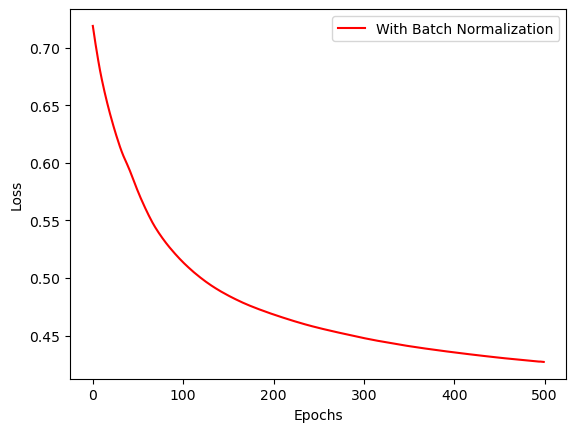

In [259]:
plt.plot(losses_BN, label='With Batch Normalization', color='red', linestyle='-')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

📝 Observations

1️⃣ Without BN

Training fluctuates more
Convergence is slower

2️⃣ With BN

Smoother training curve
Faster convergence
Less dependency on learning rate tuning


📌 When to Use Batch Normalization?

✅ Deep Networks (helps stabilize training)
✅ When dealing with varying input distributions
✅ To reduce dependence on initialization
✅ To regularize models (can reduce need for dropout)

Batch Normalization normalizes activations to improve stability, speed, and regularization. 
It is most useful in deep networks, allowing for faster and more stable training.